In [1]:
import sys
sys.path.insert(0, '..')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import dataframe_manip as hp
import pytz
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
data = hp.csv_to_timeseries_df(filepath='../wifi_data_until_20190204.csv', timezone=pytz.timezone('US/Pacific'))

In [3]:
temp = hp.get_daily_average(data, 'CLARK')

In [4]:
for i, row in temp.iterrows():
    temp.at[i,'ds'] = dt.strptime(temp.at[i, 'ds'], '%Y-%m-%d').date()
    temp.at[i, 'ds'] = temp.at[i, 'ds'].toordinal()

In [7]:
x = temp['ds']
y = temp['y']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=False) # 70% training and 30% test

In [23]:
forest = RandomForestRegressor(200)
forest.fit(x_train[:, None], y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [26]:
yfit = forest.predict(x_test[:, None])

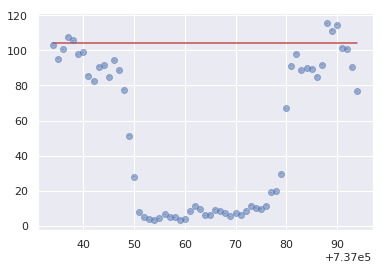

In [27]:
plt.errorbar(x_test, y_test, 0.3, fmt='o', alpha=0.5)
plt.plot(x_test, yfit, '-r');

In [12]:
print("Accuracy:",metrics.accuracy_score(y_test, yfit))

ValueError: continuous is not supported

In [28]:
print(y_train)

NameError: name 'holder' is not defined